In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
column_names = [f'feature_{i}' for i in range(57)] + ['is_spam']
spam_df = pd.read_csv(url, header=None, names=column_names)

In [ ]:
X_spam = spam_df.iloc[:, :-1].values
y_spam = spam_df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_spam, y_spam, test_size=0.3, random_state=42, stratify=y_spam
)

In [ ]:
svm_spam = SVC(kernel='linear', random_state=42)
svm_spam.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm_spam.predict(X_test)


In [ ]:
print("Spam Classification Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Spam Classification Accuracy: 0.9268645908761767

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       837
           1       0.91      0.90      0.91       544

    accuracy                           0.93      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



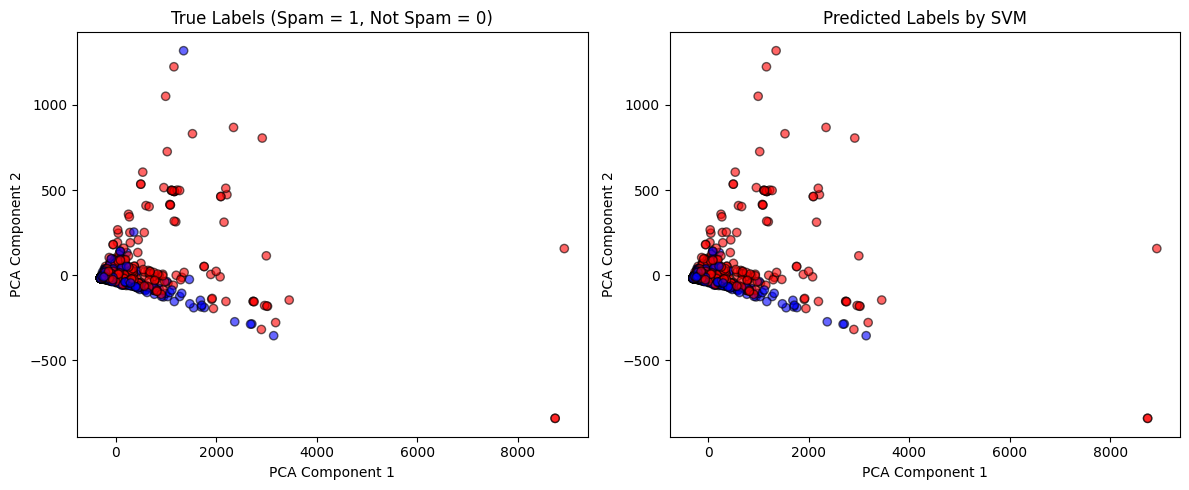

In [ ]:
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)

plt.figure(figsize=(12,5))

# Plot true labels
plt.subplot(1, 2, 1)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='bwr', alpha=0.6, edgecolor='k')
plt.title("True Labels (Spam = 1, Not Spam = 0)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred, cmap='bwr', alpha=0.6, edgecolor='k')
plt.title("Predicted Labels by SVM")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()